#### Fig4 - Landscape
#### University of Cambridge
#### Mariana Quiroga Londoño
#### 20-01-20

In [1]:
#SETTING ENVIRONMENT 
import rpy2
#import tzlocal
#%load_ext rpy2.ipython

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save=1000)

/usr/local/lib/python3.7/dist-packages/numba/core/cpu.py:77: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  numba.core.entrypoints.init_all()


In [2]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

In [43]:
adata = sc.read("./h5da_part4/020221_mq224_mRNA_Progenitors_only_postHarmony_ccfiltered_DEG_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.h5ad")

In [44]:
adata.obsm["X_draw_graph_fa"] = adata.obsm["X_draw_graph_fa"]*-1

In [45]:
adata

AnnData object with n_obs × n_vars = 35273 × 24153
    obs: 'lanes', 'mad_prd', 'auto_prd', 'barcode', 'status', 'assignment', 'log_prob_singleton', 'log_prob_doublet', 'cluster0', 'cluster1', 'cluster2', 'Sample', 'Stage', 'Tissue', 'cluster3', 'batch', 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'leiden', 'old.broad_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Sample_colors', 'Stage_colors', 'Tissue_colors', 'assignment_colors', 'draw_graph', 'hvg', 'leiden', 'leiden_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_draw_graph_fa', 'X_orig_pca', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

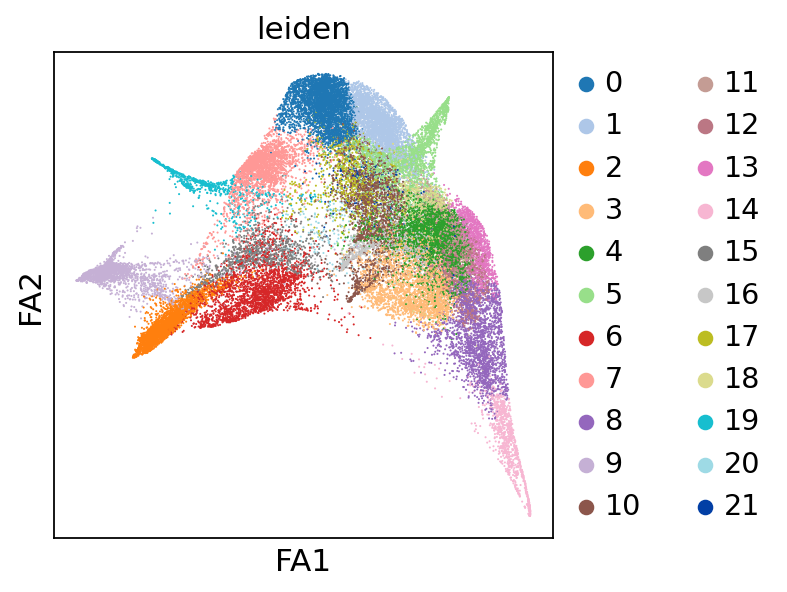

In [46]:
from matplotlib import cm, colors

new_palette = ['#1f77b4','#aec7e8','#ff7f0e',
 '#ffbb78',
 '#2ca02c',
 '#98df8a',
 '#d62728',
 '#ff9896',
 '#9467bd',
 '#c5b0d5',
 '#8c564b',
 '#c49c94',
"#bb7784",
 '#e377c2',
 '#f7b6d2',
 '#7f7f7f',
 '#c7c7c7',
 '#bcbd22',
 '#dbdb8d',
 '#17becf',
 '#9edae5',"#023fa5"]

sc.pl.draw_graph(adata, color = 'leiden', palette=new_palette,save="fig4c_landscape_22cl_20210204.pdf")

In [47]:
adata.obs["leiden.P4"]= adata.obs["leiden"]

In [48]:
labels = ["CL0_HSC/MPP","CL1_HSC/MPP","CL2_LyP (pro-B)","CL3_EryP4","CL4_EryP1","CL5_MyP",
          "CL6_?","CL7_LyP1 (CLP?)", "CL8_Late EryP1 ((Pro-)erythroblast?)","CL9_LyP (pre-B?)",
          "CL10_MEP/MkP","CL11_HSC/MPP","CL12_EryP3","CL13_EryP2","CL14_Late EryP2 (Erythroblast)","CL15_early LyP",
          "CL16_EoBasoMC","CL17_HSC/MPP","CL18_MEP","CL19_DC progenitor?","CL20_LyP (pro-B)","CL21_DC progenitor"]
             
adata.obs["Cell.labels.P4"] = adata.obs["leiden.P4"]
adata.rename_categories("Cell.labels.P4", labels)                       

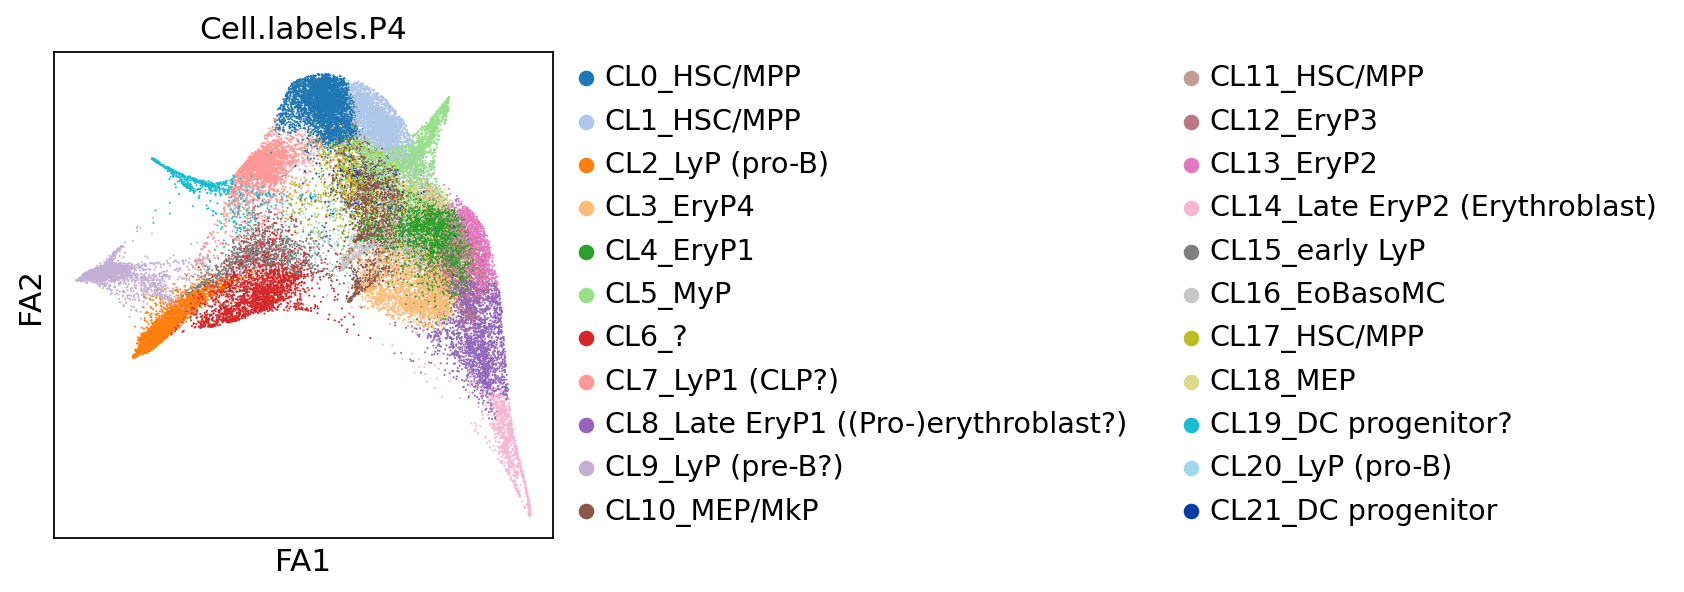

In [49]:
sc.pl.draw_graph(adata, color = 'Cell.labels.P4', palette=new_palette,save="fig4c_landscape_22annotations_20210204.pdf")

In [50]:
#adata.write("h5da_part4/020221_mq224_mRNA_Progenitors_only_postHarmony_ccfiltered_DEG_P4annotations_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.h5ad")

# Sort the annotations

In [52]:
new_labels = ['HSC/MPP I', 'MEP/MkP', 'HSC/MPP IV', 'EryP III','EryP II', 'Late EryP II (Erythroblast)', 'Early LyP','EoBasoMC', 'HSC/MPP III',
'MEP', 'DC progenitor II','HSC/MPP II', 'LyP III (pro-B)', 'DC progenitor I','LyP II (pro-B)', 'EryP IV', 'EryP I', 'MyP', 'Undetermined','LyP I (CLP)', 'Late EryP I (Pro-erythroblast)','LyP IV (pre-B)']
old_to_new = dict(zip(list(np.unique(adata.obs["Cell.labels.P4"])), new_labels))
print(old_to_new)
new_order = ["HSC/MPP I","HSC/MPP II","HSC/MPP III","HSC/MPP IV","MEP","MEP/MkP","EryP I",
 "EryP II","EryP III", "EryP IV", "Late EryP I (Pro-erythroblast)","Late EryP II (Erythroblast)","EoBasoMC", "MyP", "Early LyP","LyP I (CLP)", "LyP II (pro-B)",
 "LyP III (pro-B)", "LyP IV (pre-B)","DC progenitor I","DC progenitor II", "Undetermined"]
adata.obs['Cell.labels.P4.sorted'] = (
    adata.obs["Cell.labels.P4"]
    .map(old_to_new)
    .astype('category')
)

{'CL0_HSC/MPP': 'HSC/MPP I',
 'CL10_MEP/MkP': 'MEP/MkP',
 'CL11_HSC/MPP': 'HSC/MPP IV',
 'CL12_EryP3': 'EryP III',
 'CL13_EryP2': 'EryP II',
 'CL14_Late EryP2 (Erythroblast)': 'Late EryP II (Erythroblast)',
 'CL15_early LyP': 'Early LyP',
 'CL16_EoBasoMC': 'EoBasoMC',
 'CL17_HSC/MPP': 'HSC/MPP III',
 'CL18_MEP': 'MEP',
 'CL19_DC progenitor?': 'DC progenitor II',
 'CL1_HSC/MPP': 'HSC/MPP II',
 'CL20_LyP (pro-B)': 'LyP III (pro-B)',
 'CL21_DC progenitor': 'DC progenitor I',
 'CL2_LyP (pro-B)': 'LyP II (pro-B)',
 'CL3_EryP4': 'EryP IV',
 'CL4_EryP1': 'EryP I',
 'CL5_MyP': 'MyP',
 'CL6_?': 'Undetermined',
 'CL7_LyP1 (CLP?)': 'LyP I (CLP)',
 'CL8_Late EryP1 ((Pro-)erythroblast?)': 'Late EryP I (Pro-erythroblast)',
 'CL9_LyP (pre-B?)': 'LyP IV (pre-B)'}

In [58]:
adata.obs['Cell.labels.P4.sorted'] = adata.obs['Cell.labels.P4.sorted'].cat.reorder_categories(new_order)

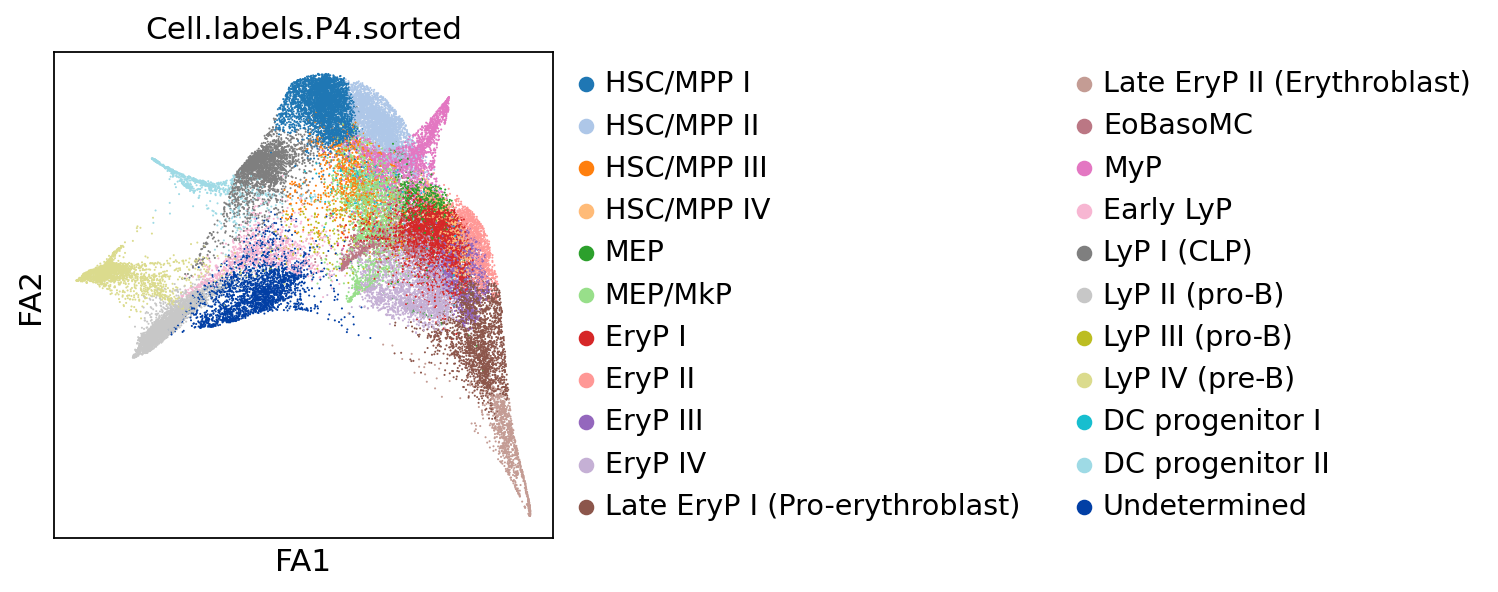

In [59]:
sc.pl.draw_graph(adata, color = 'Cell.labels.P4.sorted', palette=new_palette,save="fig4c_landscape_22annotations_sorted_20210205.pdf")

In [61]:
adata.write("h5da_part4/050221_mq224_mRNA_Progenitors_only_postHarmony_ccfiltered_DEG_P4_sorted_annotations_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.h5ad")

In [42]:
!pip list 

Package                           Version
--------------------------------- --------------------
alabaster                         0.7.8
altair                            4.1.0
anndata                           0.7.4
annoy                             1.16.3
appdirs                           1.4.3
arrow                             0.15.5
atomicwrites                      1.3.0
attrs                             18.2.0
Babel                             2.6.0
backcall                          0.1.0
bash-kernel                       0.7.2
batchglm                          0.7.3
bbknn                             1.3.7
beautifulsoup4                    4.8.2
bioinfokit                        0.7.1
bioservices                       1.6.0
bleach                            3.1.0
bokeh                             1.4.0
boto3                             1.12.49
botocore                          1.15.49
cellrank                          1.0.0
certifi                           2020.6.20
cffi        

You should consider upgrading via the '/bin/python3 -m pip install --upgrade pip' command.
